<a href="https://colab.research.google.com/github/joaovvitor/shabel_model/blob/master/Shabel_netpyne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the simulation

In [1]:
%pwd
# Checking the current folder location within the virtual machine
%cd /content/
%pwd

/content


'/content'

In [ ]:
# Installing the required packages
%pip install neuron
%pip install netpyne 
# Importing the required libraries
import matplotlib   # for ploting 
import os           # for navigation and operations outside python
import json         # for data handling

In [3]:
# Making sure that there is no previous instance of the project folder
if os.path.isdir('/content/shabel_model'):
  print('here')
  %ls
  %rm -r /content/shabel_model
  %ls



In [4]:
# Cloning the project folder from github
!git clone https://github.com/joaovvitor/shabel_model.git

Cloning into 'shabel_model'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 78 (delta 28), reused 63 (delta 17), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [ ]:
# Changing current folder to the project
%cd /content/shabel_model/sim

%rm -r /content/shabel_model/mod/x86_64
!ln -s /content/shabel_model/mod/x86_64 x86_64
%cd /content/shabel_model/mod
!nrnivmodl
%cd /content/shabel_model/sim


%pwd

# Debugging sections

Run this section if you have previously ran the 'data/init_sim'


In [ ]:
%cd /content/shabel_model/
if os.path.isdir('/content/shabel_model/data/init_sim/'):
  %rm -r /content/shabel_model/data/init_sim/
  print("sim data removed")

In [6]:
!python3 -i /content/shabel_model/sim/netParams.py


KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [7]:
!python3 -i /content/shabel_model/sim/cfg_file.py

--No graphics will be displayed.
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


# Runnuing an Init Sim

In [ ]:
%cd /content/shabel_model/sim
!python3 init.py

/content/shabel_model/data/CoCell
CoCell_batch_tutorial_shape.png  CoCell_batch_tutorial_traces.png
CoCell_batch_tutorial_traces.png


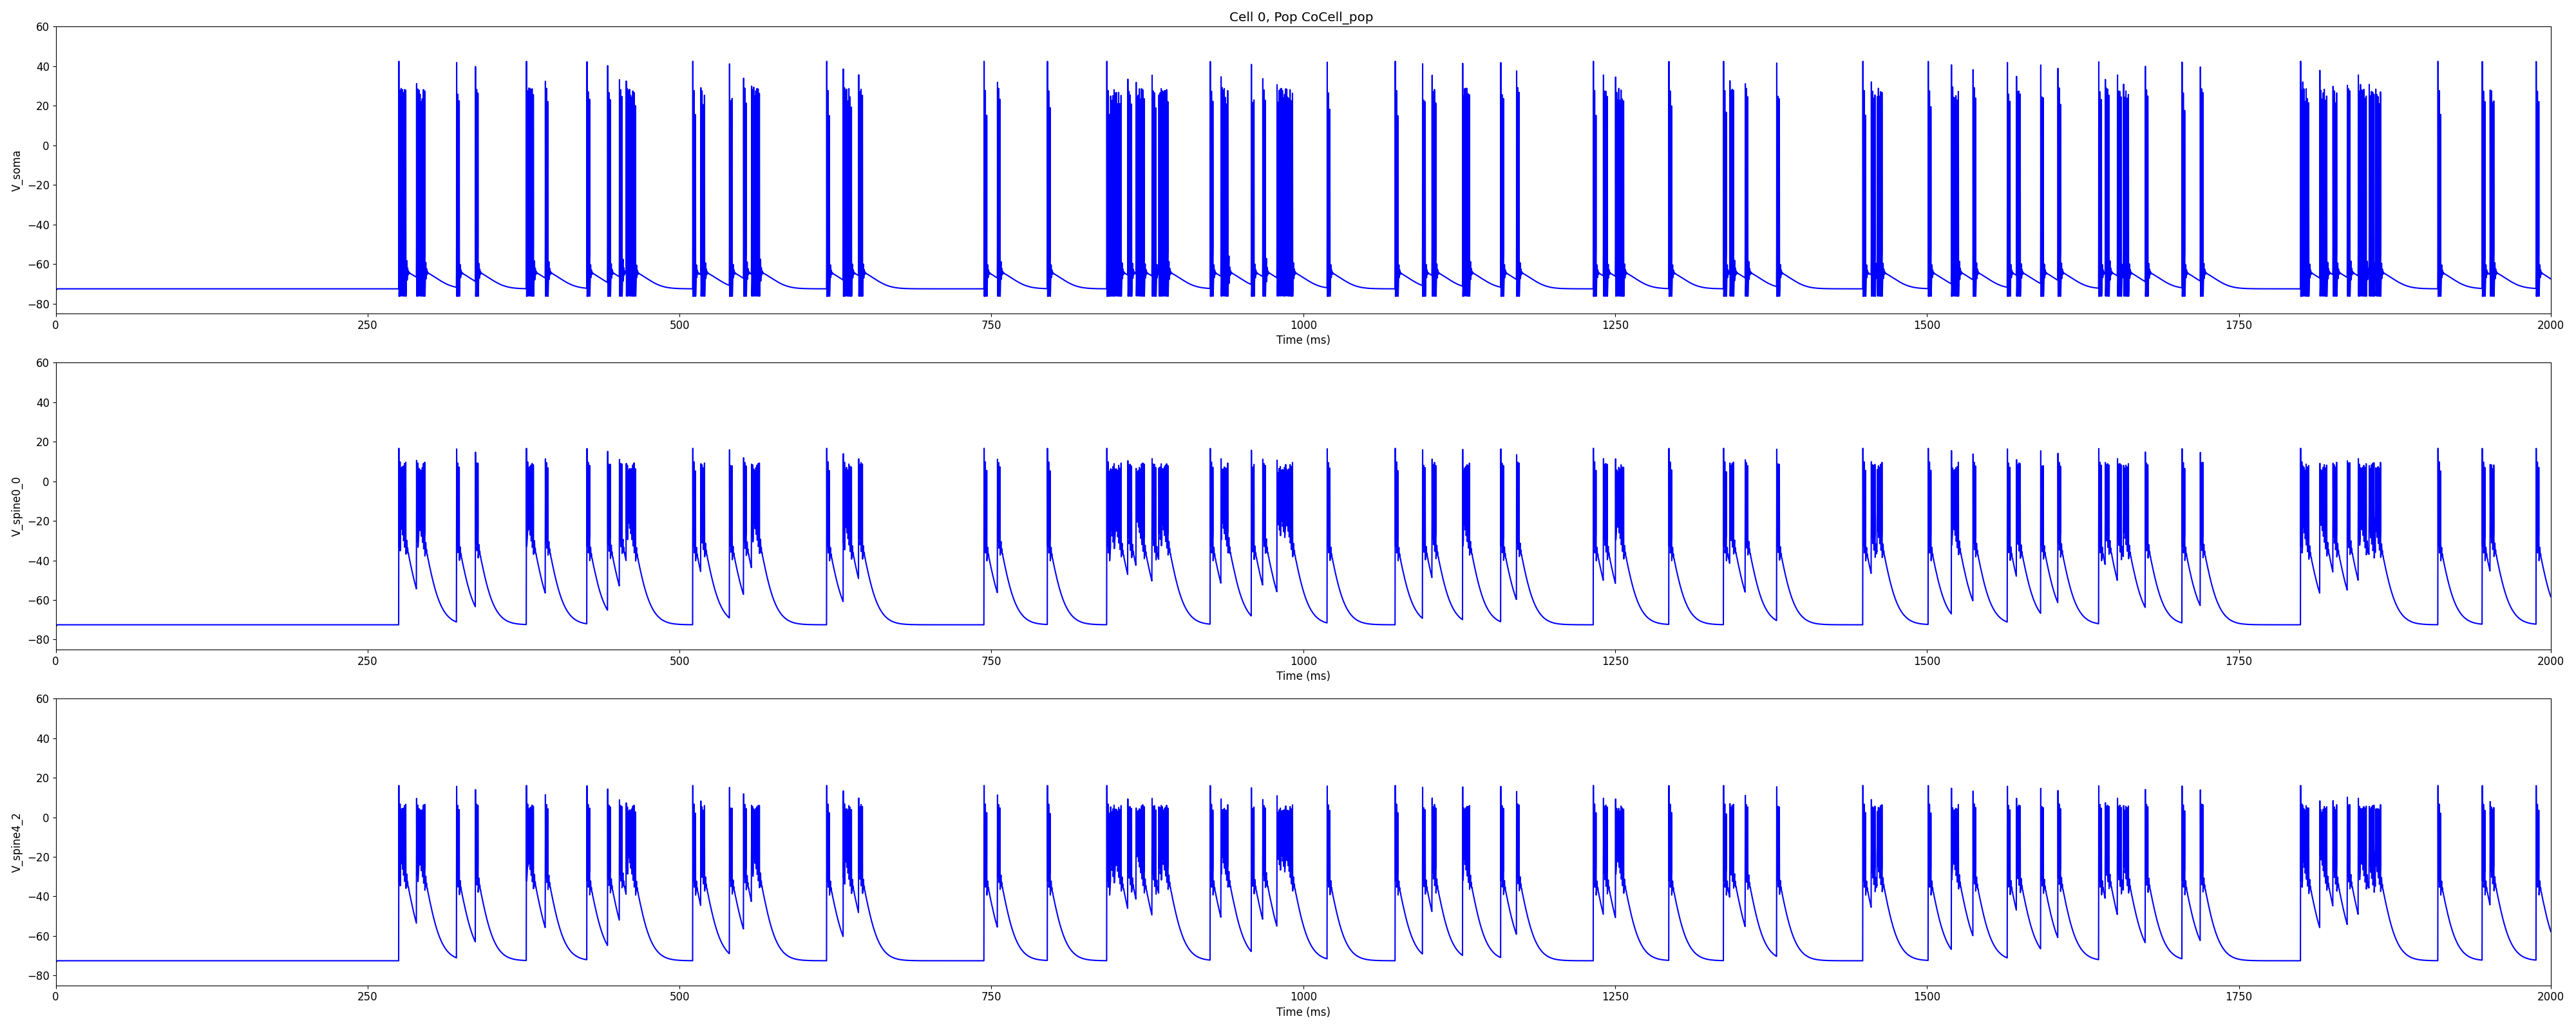

In [8]:
%cd /content/shabel_model/data/CoCell/
import os           # for navigation and operations outside python
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/shabel_model/data/CoCell/'):
  if f_name.endswith('traces.png'):
    list_of_files.append(f_name)
list_of_files.sort()

%pwd
%ls
 
for i in list_of_files:
  print(i)
  display(Image(i))
  # display(Image(i, width=800, height=800))

# Running the Batch simulation

In [ ]:
from netpyne import specs, sim
%matplotlib inline
from netpyne import specs
from netpyne.batch import Batch
import numpy as np

def changeWeight():
        # params
        params = specs.ODict()
        params['synMech'] = [   ['AMPA'],
                                ['GABAA'],
                                ['AMPA','GABAA'],   
                                ['AMPA','GABAA'],
                                ['AMPA','GABAA'],
                                ]
        params['synMechWF'] = [ [1],
                                [1],
                                [0.5,0.5],
                                [0.25,0.75],
                                [0.75,0.25],
                                ]
        
        initCfg = {}
        initCfg['addManySecs_NetStim']=True
        initCfg[('savePlots')]=True # skips saving the figures for each simulation
        initCfg[('saveJson')]=True # skips saving the figures for each simulation
        # initCfg[('hParams', 'celsius')] = 37
        
        # groupedParams
        groupedParams = ['synMech','synMechWF'] 
        
        # batch
        b = Batch(params=params, netParamsFile='netParams.py', cfgFile='cfg_file.py', initCfg=initCfg, groupedParams=groupedParams)

        # Set output folder, grid method (all param combinations), and run configuration
        b.batchLabel = 'Sheibel_CoCell'
        b.saveFolder = '/content/shabel_model/data/batch_sim'
        b.method = 'grid'
        b.runCfg = {'type': 'mpi_bulletin',
                            'script': '/content/shabel_model/sim/init.py',
                            'skip': True}

        # Run batch simulations
        b.run()

# Main code
%cd /content/shabel_model/sim/
%pwd
if __name__ == '__main__':
        changeWeight()

# NetStims data

In [13]:
%cd /content/shabel_model/data/batch_sim/

/content/shabel_model/data/batch_sim


__pycache__/                       Sheibel_CoCell_2_2_traces.png
Sheibel_CoCell_0_0_cfg.json        Sheibel_CoCell_3_3_cfg.json
Sheibel_CoCell_0_0.json            Sheibel_CoCell_3_3.json
Sheibel_CoCell_0_0_raster_gid.png  Sheibel_CoCell_3_3_traces.png
Sheibel_CoCell_0_0_traces.png      Sheibel_CoCell_4_4_cfg.json
Sheibel_CoCell_1_1_cfg.json        Sheibel_CoCell_4_4.json
Sheibel_CoCell_1_1.json            Sheibel_CoCell_4_4_raster_gid.png
Sheibel_CoCell_1_1_traces.png      Sheibel_CoCell_4_4_traces.png
Sheibel_CoCell_2_2_cfg.json        Sheibel_CoCell_batch.json
Sheibel_CoCell_2_2.json            Sheibel_CoCell_batchScript.py
Sheibel_CoCell_2_2_raster_gid.png  Sheibel_CoCell_netParams.py*
Sheibel_CoCell_0_0_traces.png


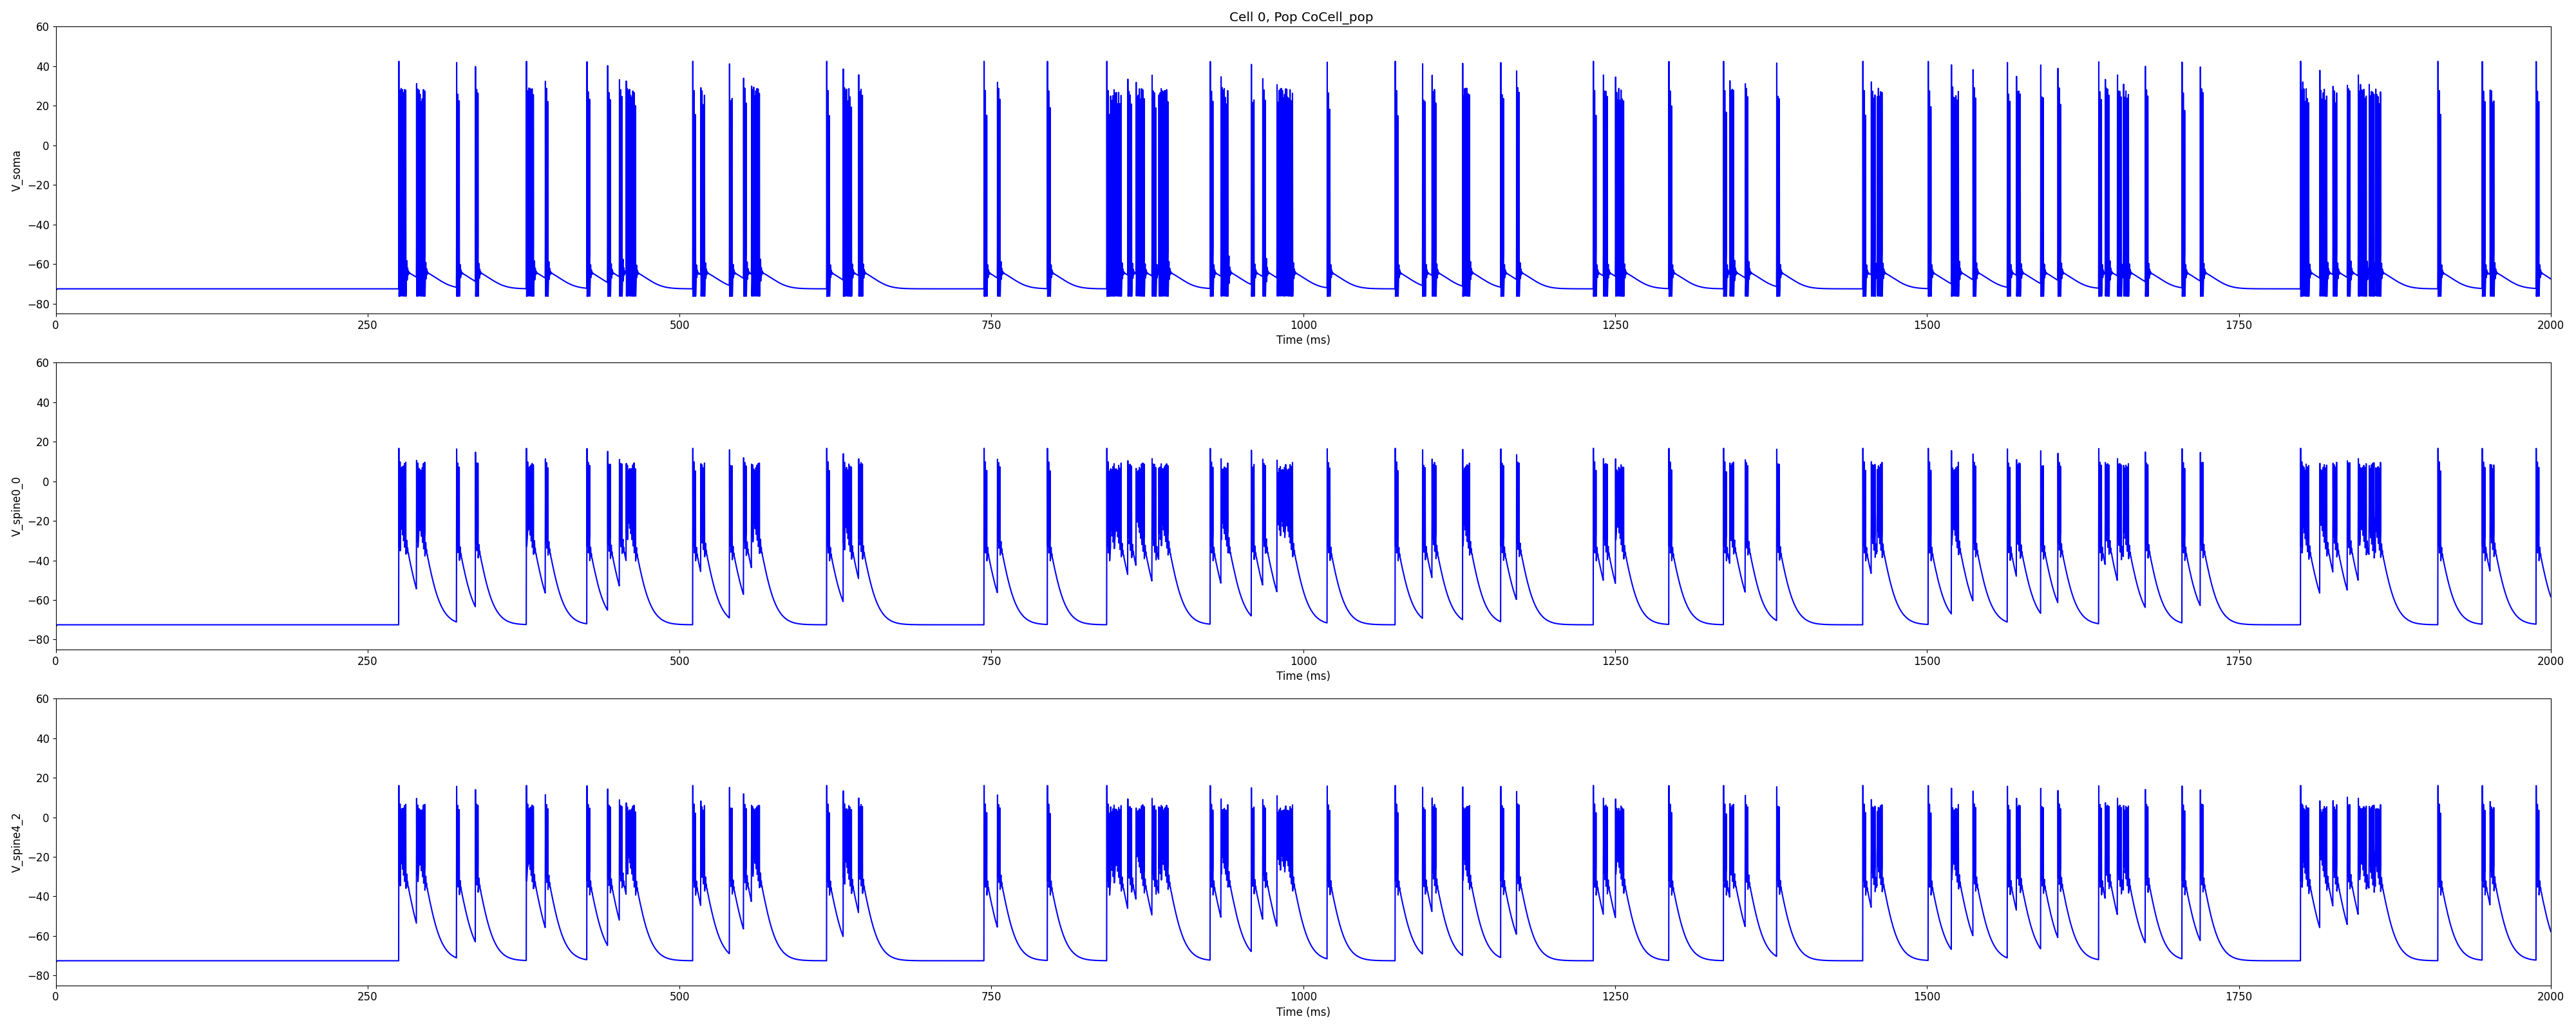

Sheibel_CoCell_1_1_traces.png


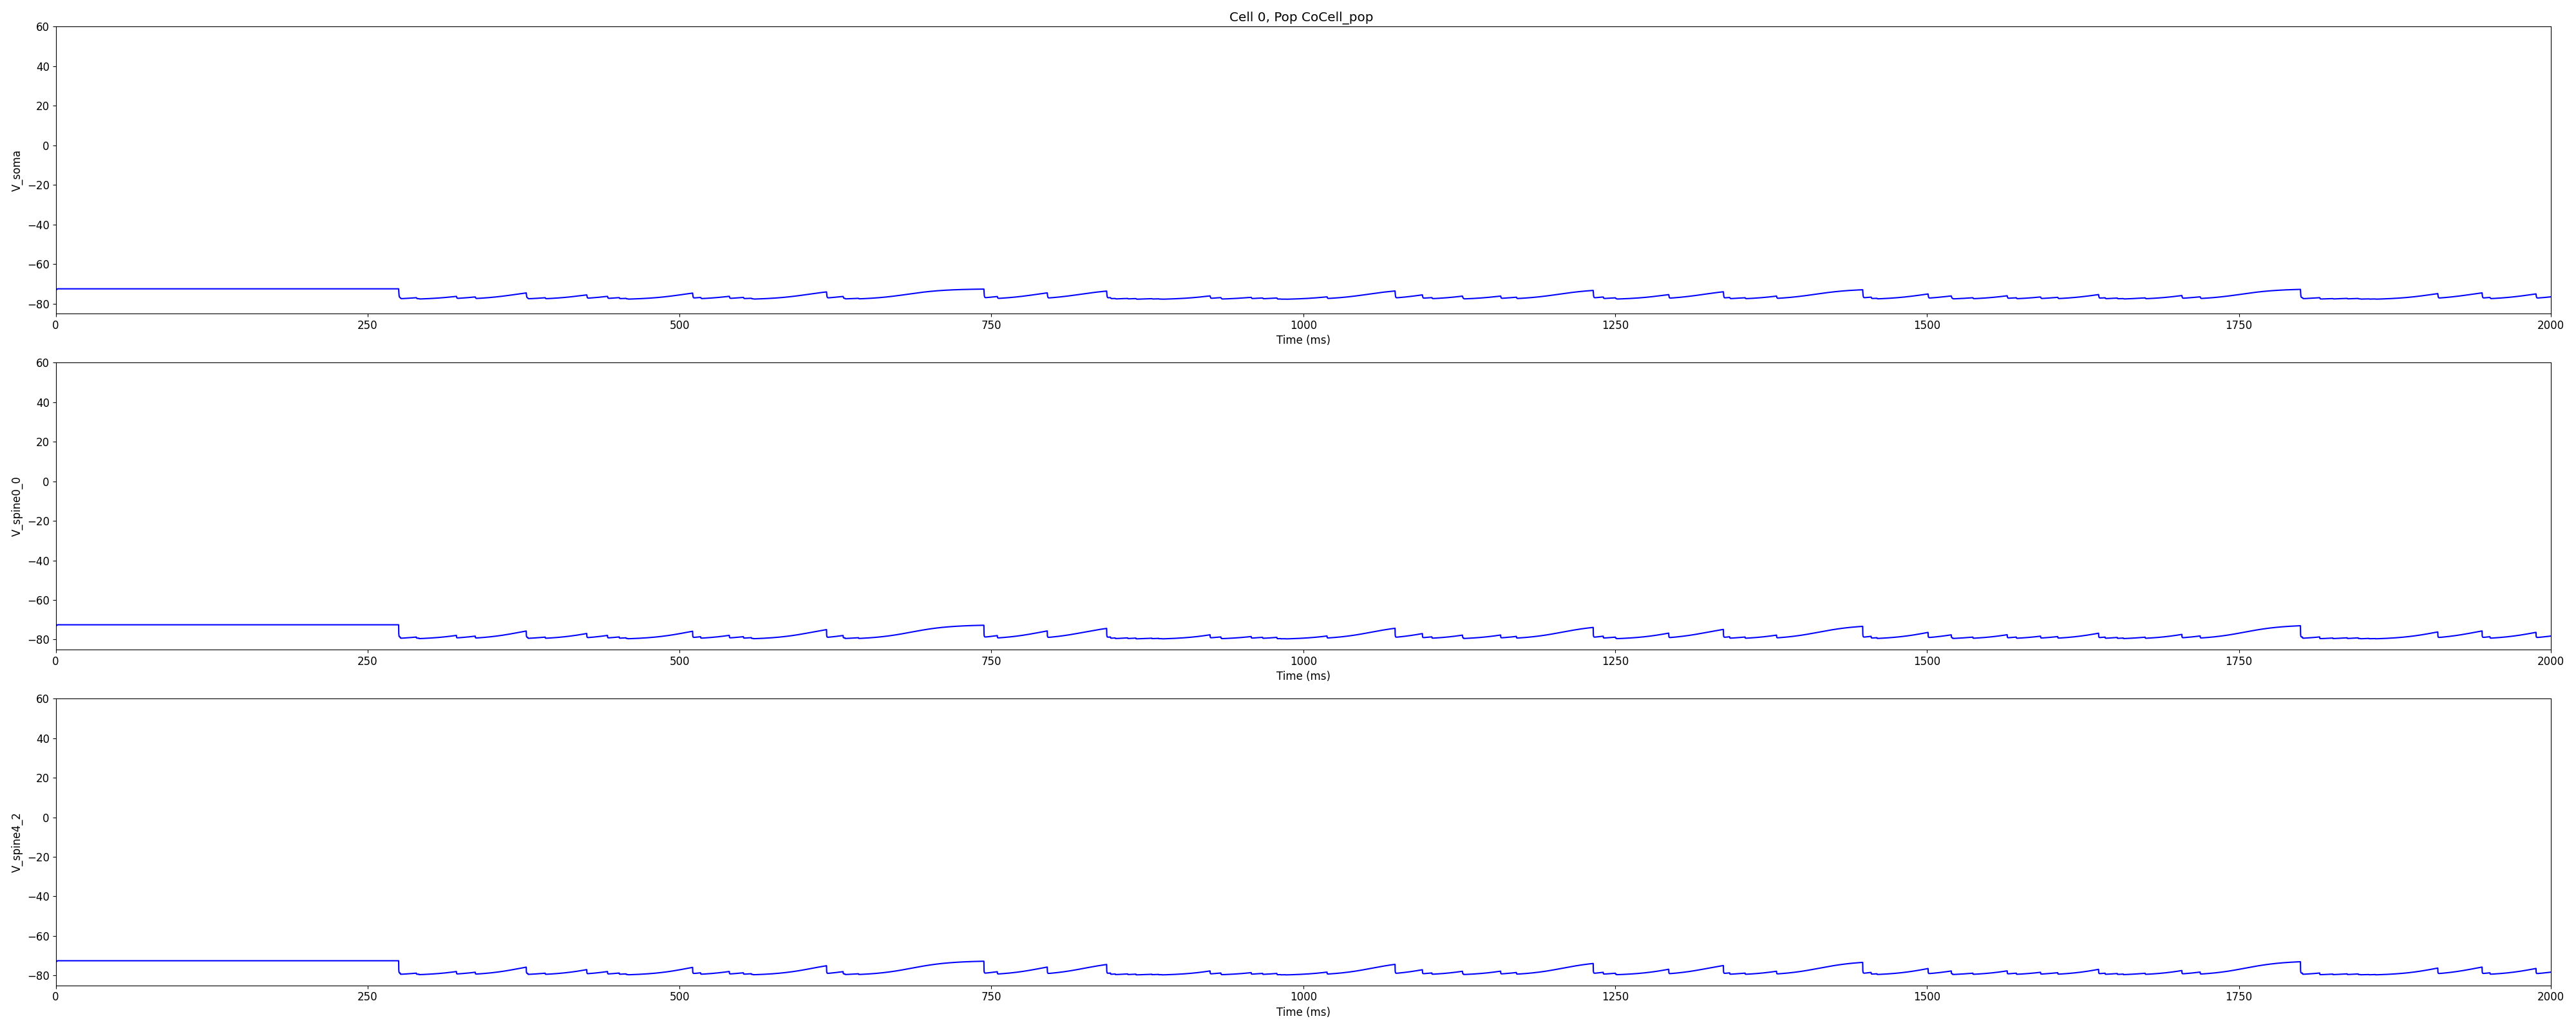

Sheibel_CoCell_2_2_traces.png


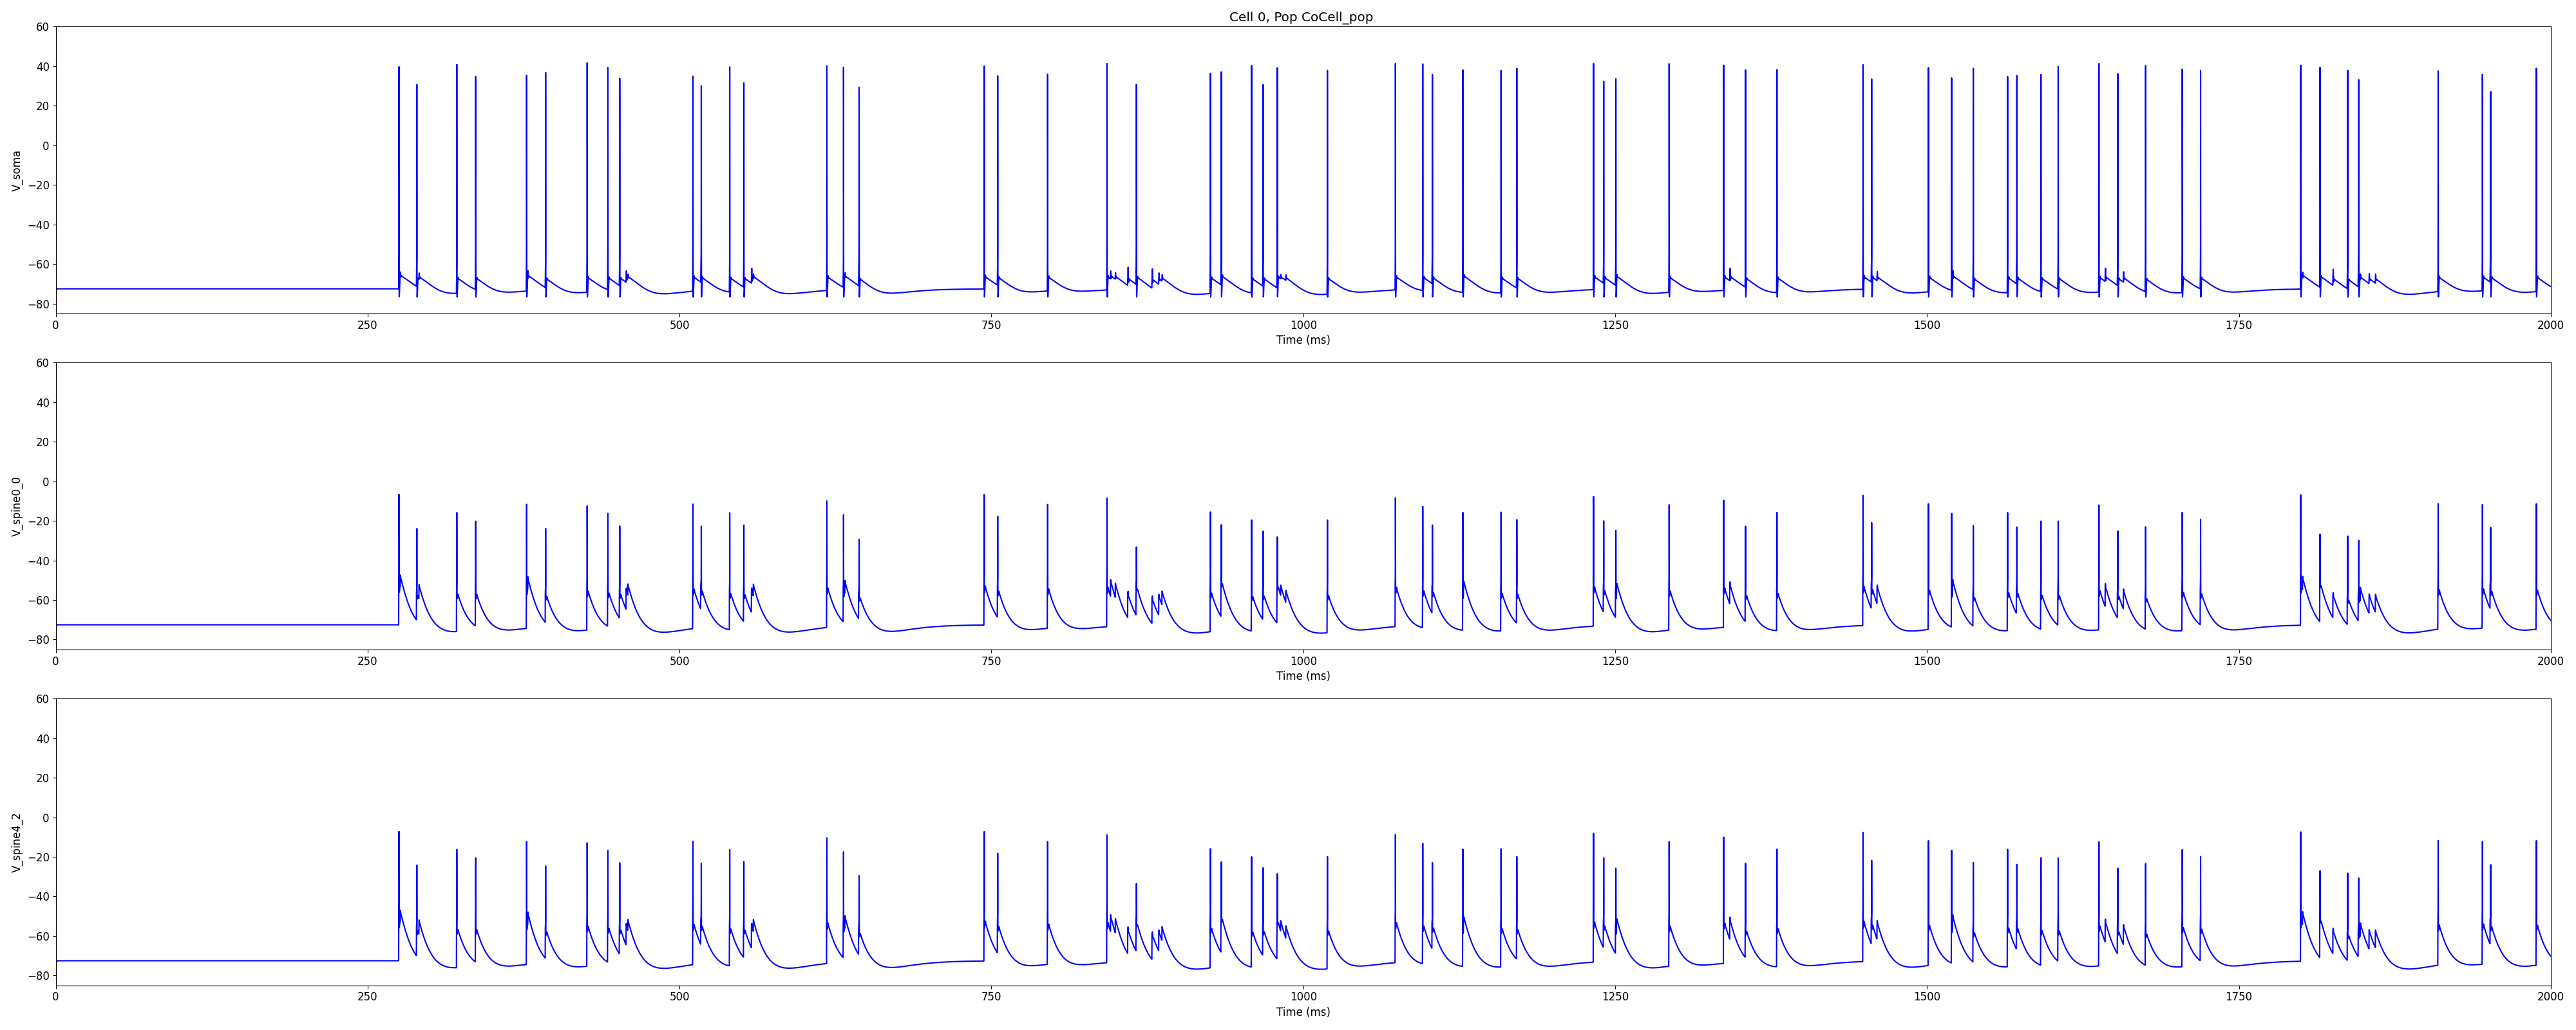

Sheibel_CoCell_3_3_traces.png


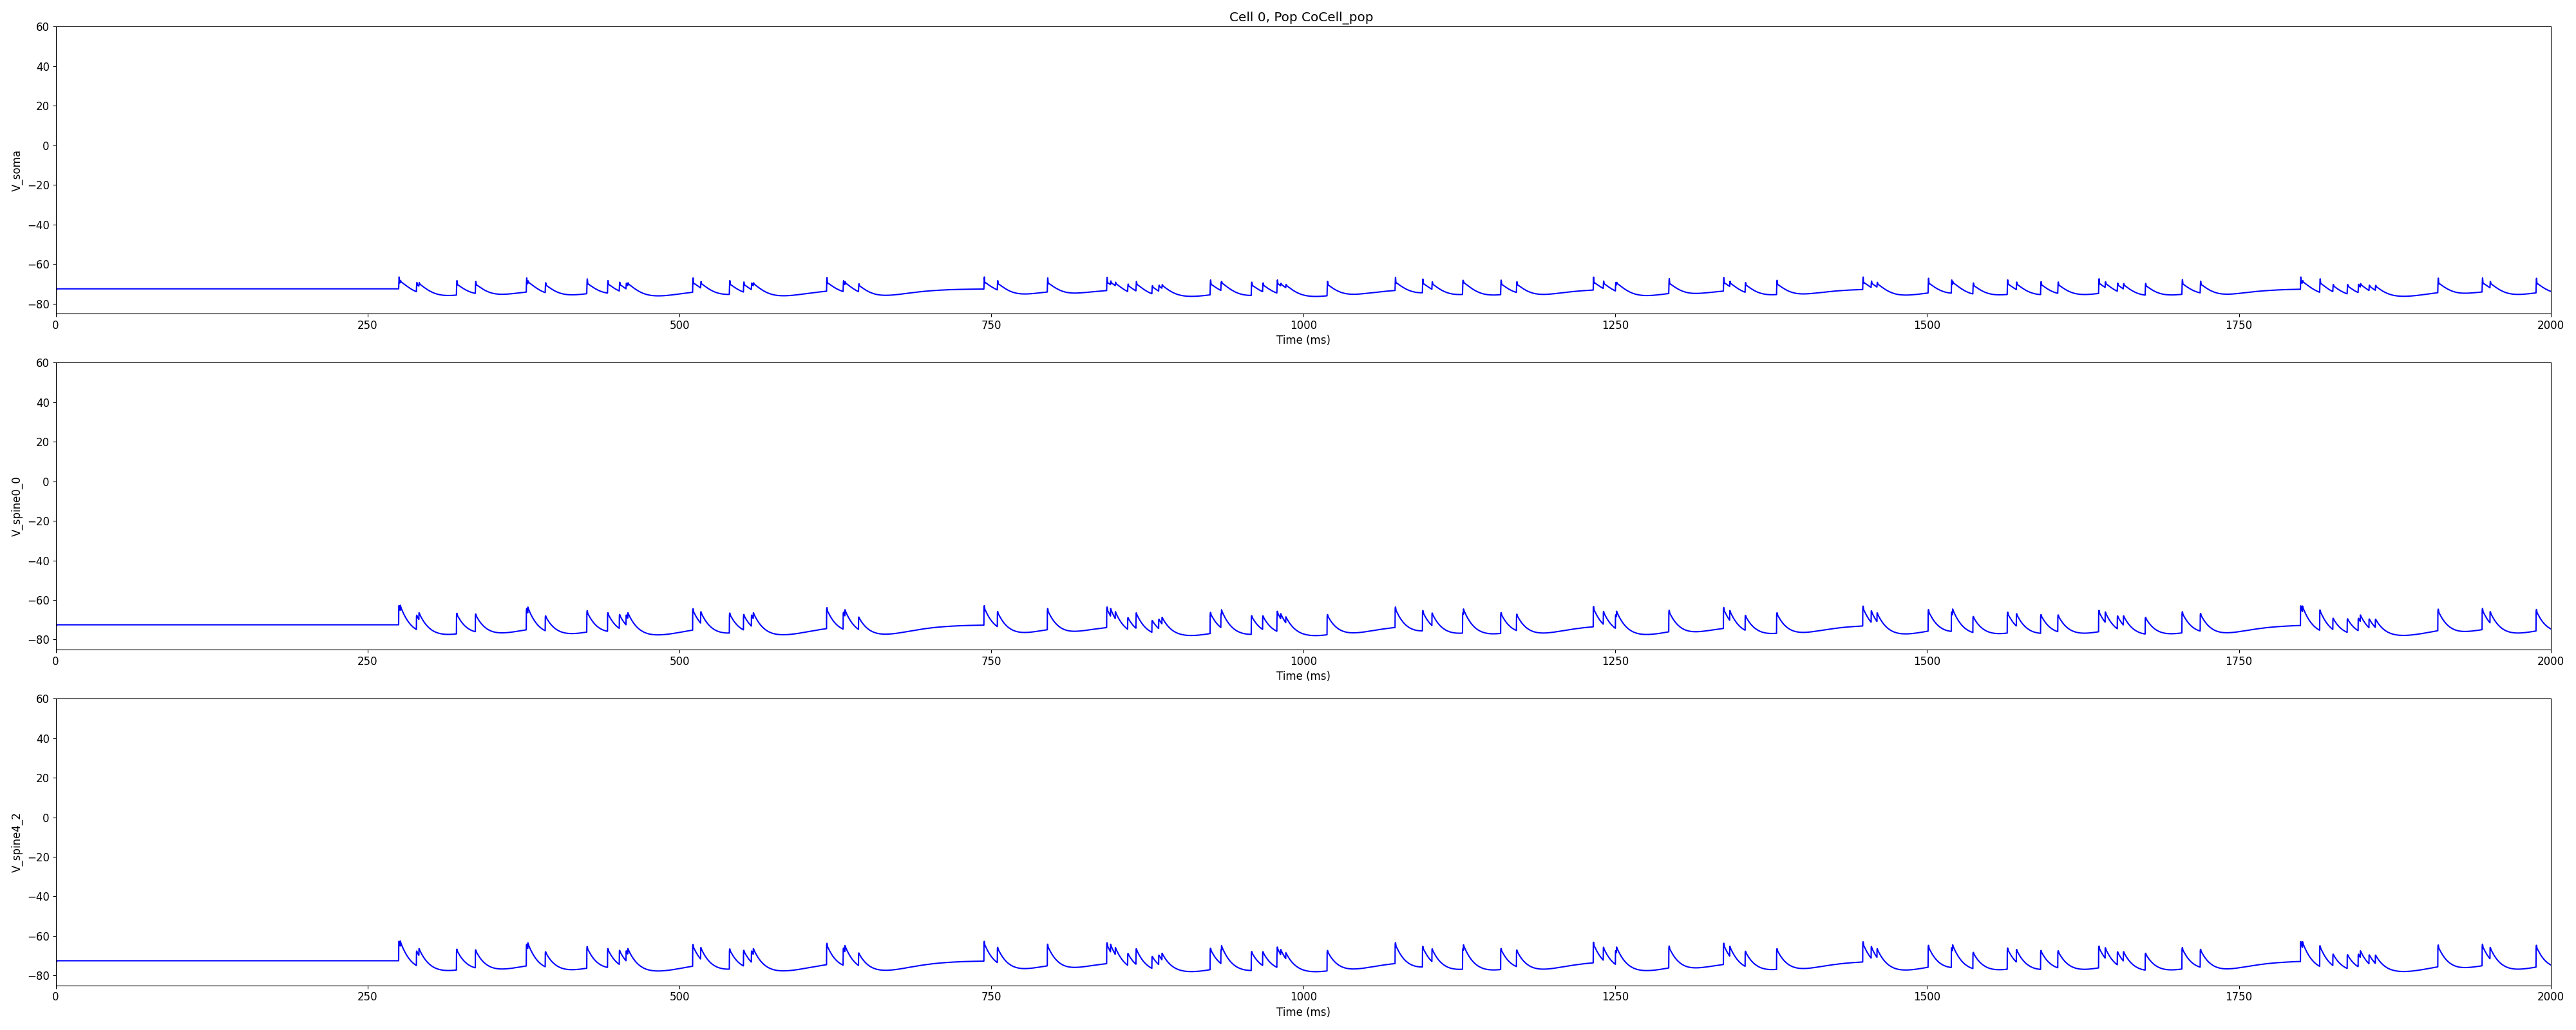

Sheibel_CoCell_4_4_traces.png


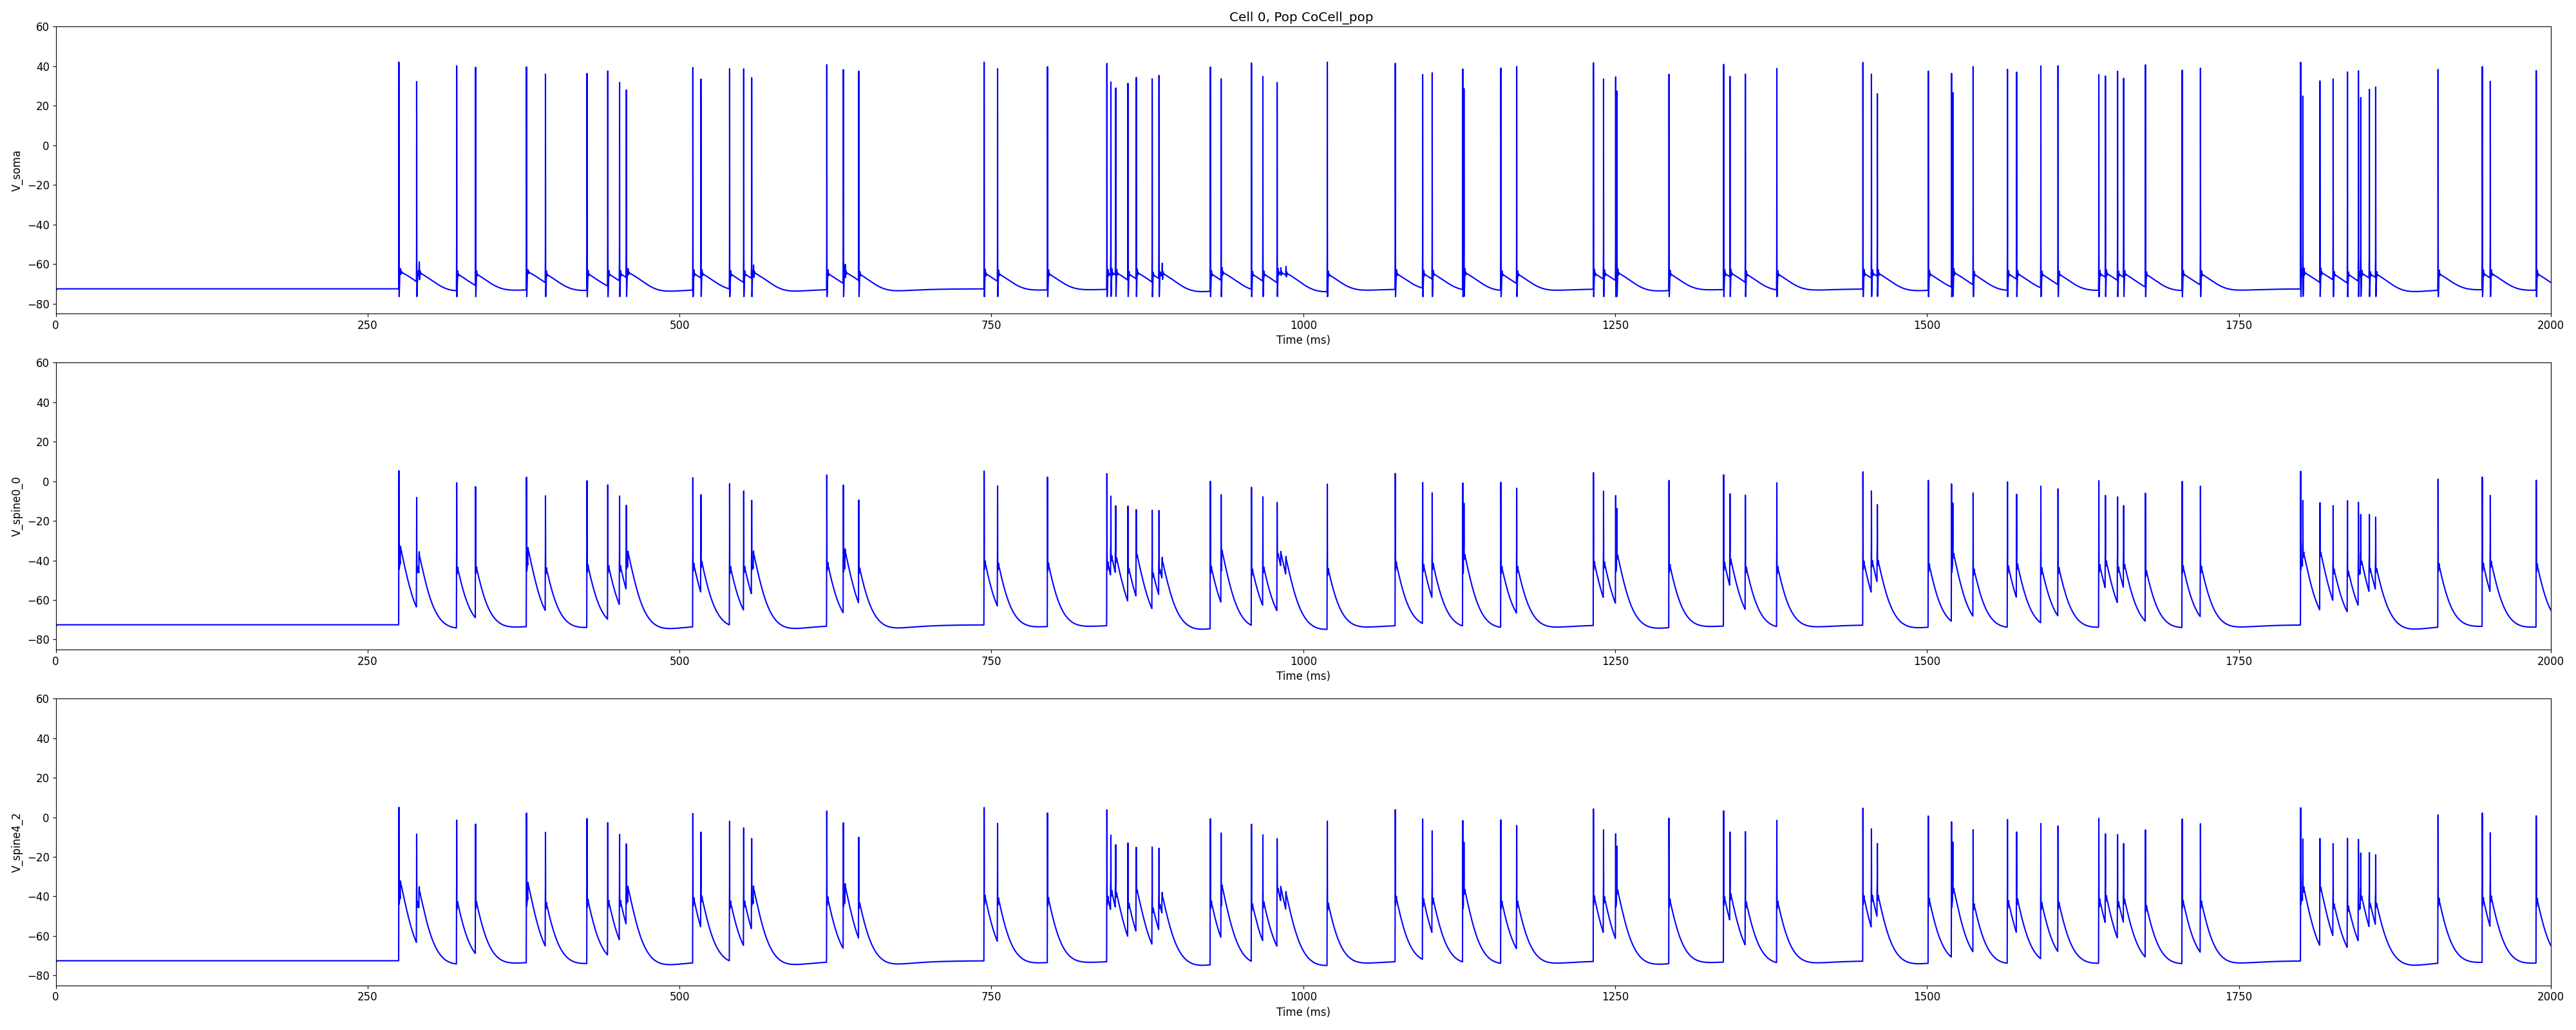

In [14]:
import os           # for navigation and operations outside python
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/shabel_model/data/batch_sim/'):
  if f_name.endswith('traces.png'):
    list_of_files.append(f_name)
list_of_files.sort()

%pwd
%ls

for i in list_of_files:
  print(i)
  display(Image(i))
  # display(Image(i, width=500, height=500))

In [ ]:
%cd /content/shabel_model

In [ ]:
%pwd

'/content/shabel_model/sim'